In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

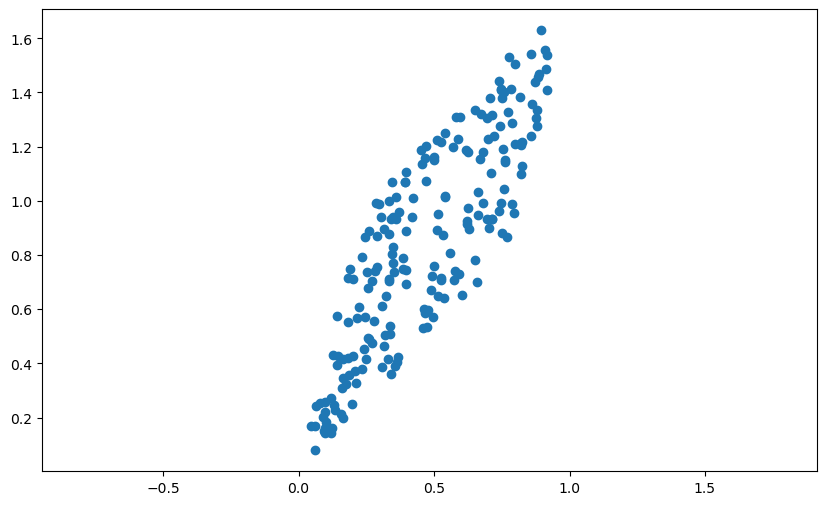

In [88]:
rng = np.random.RandomState(13)
X = np.dot(rng.rand(2,2),rng.rand(2,200)).transpose()

X[:,0]
X[:,1]
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show();

In [89]:
pca = PCA(n_components=2,random_state=13)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

[[ 0.50998048  0.86018597]
 [ 0.86018597 -0.50998048]]
[0.19548528 0.01259639]


In [90]:
print('모델의 주성분 벡터 : ',pca.components_)
print('설명력 : ', pca.explained_variance_)
print('설명력 비율 : ', pca.explained_variance_ratio_)
print('중심점 : ', pca.mean_)

모델의 주성분 벡터 :  [[ 0.50998048  0.86018597]
 [ 0.86018597 -0.50998048]]
설명력 :  [0.19548528 0.01259639]
설명력 비율 :  [0.93946419 0.06053581]
중심점 :  [0.47074435 0.84514225]


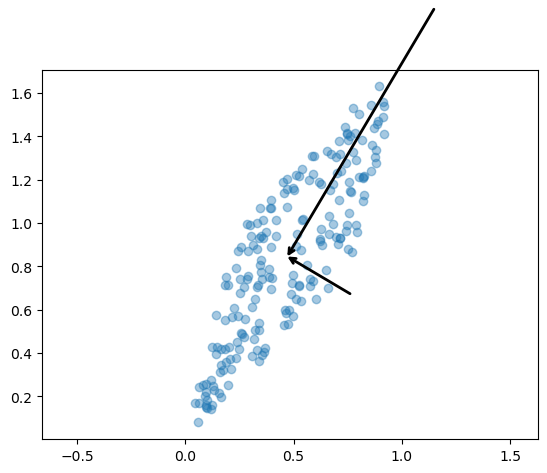

In [91]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                    linewidth=2,color='black',
                    shrinkA=0,shrinkB=0)
    ax.annotate('',v0,v1,arrowprops=arrowprops)

plt.scatter(X[:,0],X[:,1], alpha=0.4)

for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal')
plt.show()

### 주성분을 하나만 뽑는다면?

[[0.50998048 0.86018597]]
[0.19548528]


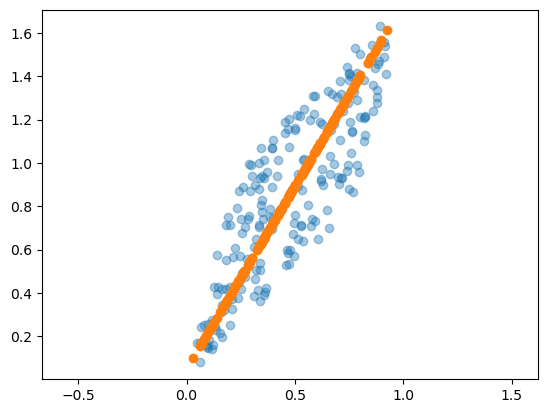

In [107]:
pca = PCA(n_components=1,random_state=13)
pca.fit_transform(X)
print(pca.components_)
print(pca.explained_variance_)
X_pca = pca.transform(X)

X_p1 = pca.inverse_transform(X_pca)

plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.axis('equal')
plt.scatter(X_p1[:,0],X_p1[:,1])
plt.show();

## Iris 데이터 주성분분석

In [134]:
from sklearn.datasets import load_iris
iris = load_iris()
ss = StandardScaler()
data = ss.fit_transform(iris.data)

df = pd.DataFrame(data,columns=iris.feature_names)
df['species'] = iris.target

pca = PCA(n_components=2,random_state=13)
iris_pca = pca.fit_transform(data)

df_pca = pd.DataFrame(iris_pca,columns=['PCA1','PCA2'])
df_pca['species'] = iris.target
df_pca

,PCA1,PCA2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


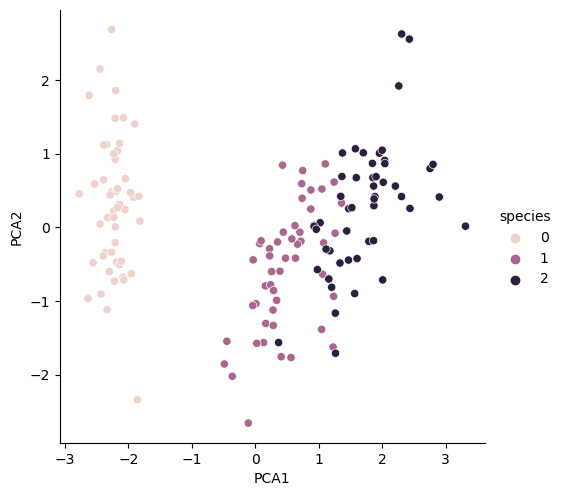

In [135]:
sns.pairplot(df_pca,x_vars=['PCA1'],y_vars=['PCA2'],hue='species',height=5)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
def cross_val_scoring(X, y, cv=5):
    
    rf = RandomForestClassifier(random_state=13, n_estimators=100)

    scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('평균 정확도 : ', np.mean(scores))

In [160]:
X = df_pca[['PCA1', 'PCA2']]
y = iris.target
cross_val_scoring(X,y)

평균 정확도 :  0.9066666666666666
